# TOO BASED INTRODUCTION  

Я думаю, что необычайный интерес к математической статистике появился сразу же после, как люди узнали про профессию Дата - Саетинста ( Сатаниста, Шрушера, и т.д) и полезли в википедии или на рандомные статейки про сложные термины, но наткнулись на математические выкладки, которые никому не интересны.

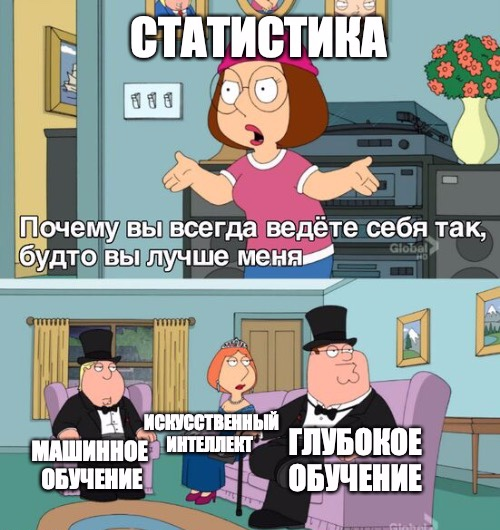

Я сам такой же, но я решил пойти другим путем, и чтобы лишний раз ничего не конспектировать или не открывать сотни курсов, написал свой курс про мат.стат и его реализацию на Питоне, с помощью различных библиотек.

В данном курсе будут как теоретические знания, по типу статей с википедий или каких-то заумных терминов из учебников в виде pdf отредаченных с помощью LaTeX, а также мои мысли о понимании этих вещей более простым языком. может быть с мемами.

В первом занятии посмотрим на базовые вещи из мат.стата, и попрактикуемся в визуализации данных, так как я думаю, что вещи по типу целей и для чего используются методы математической статистики будут мало интересовать, а особенно меня.

In [1]:
# импортируем пакеты для работы с данными

import numpy as np # для работы с векторами
import pandas as pd # для работы с табличками
import scipy # для импорта статистических функций

import matplotlib.pyplot as plt # визуализация
import seaborn as sb # визуализация

plt.style.use('ggplot') # стиль графика

import warnings # игнорим ошибки
warnings.filterwarnings("ignore")

# Распределения

Начав изучение математической статистики, мы всегда обращаемся к теории вероятности, а как всем известно, ключевой элемент теории вероятности - распределения. Заранее скажу, их много, и даже если вы уже изучали теорию вероятности, то скорее всего не догадываетесь о некоторых распределениях, которые я вам сейчас покажу.

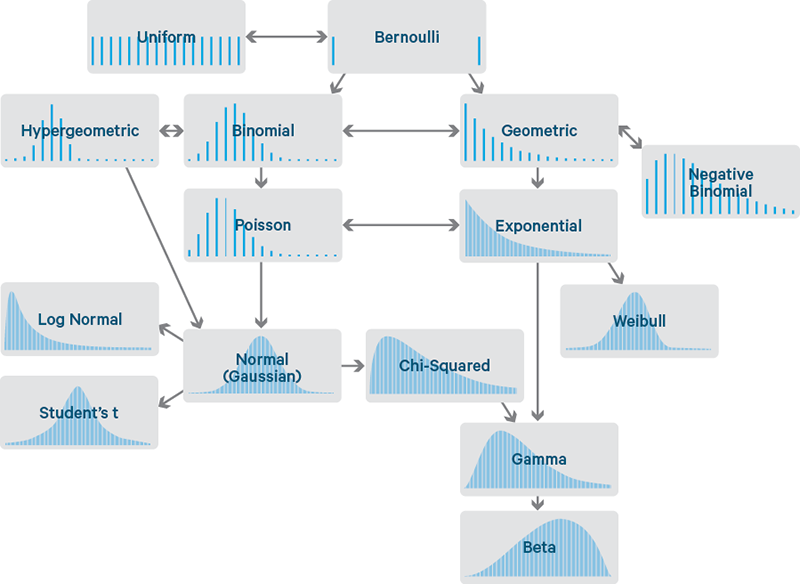

                           Однако, заранее нужно сказать, что есть различия между распределениями.

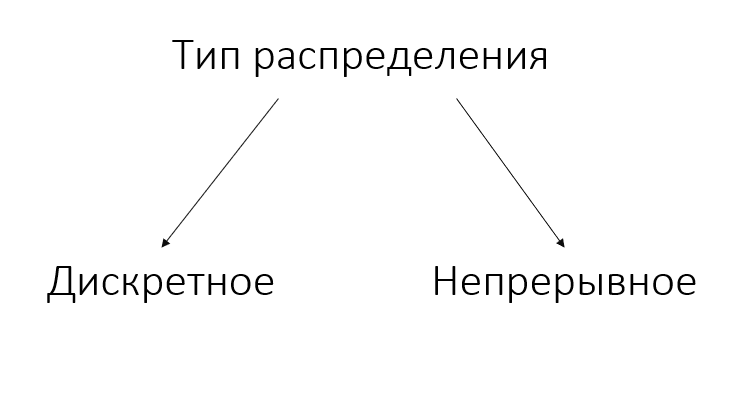

У дискретных случайных величин нет функции плотности, так как вероятность того, что значение окажется между чем-то и чем-то рассчитывается по функции распределения вероятности.

<p style="text-align: center;"> Функция распределения </p>

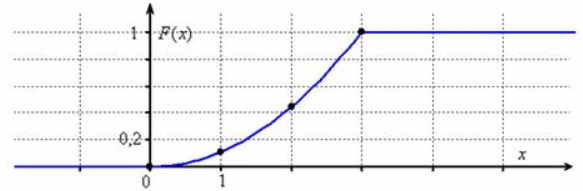

Чтобы вычислить, какую вероятность имеет случай, что величина будет в интервале от 1 до 4, нам необходимо воспользоваться функцией распределения. 

# Дискретные распределения

### Начну с базового дискретного распределения - Биномиального.
P.S Многим из вас оно знакомо по типичным задачам по стрелками / монетками.

Будем использовать наиболее распространенный пакет для генерации распределений - **scipy.stats**, но для некоторых наиболее популярных распределений (нормального), можно использовать функции пакета **numpy**.

Для начала создания распределения, создадим класс распределения.

In [2]:
import scipy.stats as sts

In [3]:
binomial = sts.binom(20,p=0.5) # сгенерировали 20 бросков монетки (создали класс биномиального распределения)

In [4]:
sample = binomial.rvs(size = 100) # с помощью метода rvs, сгенерировали numpy.array с 100 бросками монетки
print(sample)

[ 3  9 13 10  9 10 12 13 10 11 10 10 13 14 13 10  9  7 14 12 10  9 14 10
 11  9 10 12 13  8 10 10  7 11 10  9 13 12 10 10 13  9 13 10 11 12 10 10
  8  9  9 11  6 10  9  6  9 11 10  8  8  9 11 11  7 11 10 12 10 11 12 11
 11  9 11 12 11 16 12 12  9 11 12  9 11  8  8  9  9 10  8 11  9  8  8  8
  7  8 11 10]


In [5]:
binomial.cdf(9) # значение функции распределения в точке x

0.41190147399902316

In [6]:
binomial.ppf(0.5) # параметр - это квантиль (0.1,0.5, etc.), если не знаете, или забыли Квантиль - значение, 
               # которое заданная случайная величина не превышает с фиксированной вероятностью (0.25,0.99 и т.д)

10.0

In [7]:
binomial.mean() # средняя

10.0

In [8]:
binomial.median() # медиана

10.0

In [9]:
binomial.median() == binomial.ppf(0.5) # 50% квантиль всегда равен медиане

True

In [10]:
binomial.var() # дисперсия

5.0

In [11]:
binomial.std() # стандартное отклонение = корень из дисперсии

2.23606797749979

In [102]:
def plot_(data, name, distribution):
    """ Строит график по заданной выборке распределения и переназначает оси графика
    
    :param data: Выборка
    :type data: list or numpy.array
    :param name: Название выбранного распределения
    :type name: str """
    grid = np.linspace(-5, 5, 1000)  # сетка для построения графика
    plt.figure(figsize=(16, 7))
    plt.hist(data, bins=30, density=True, 
         alpha=0.6, label='Гистограмма выборки')
    if name not in [' Биномиальное'," Пуассона"," Геометрическое"," Гипергеометрическое"]:
        plt.plot(grid, distribution.pdf(grid), color='red', 
             lw=5, label='Плотность случайной величины') 
    plt.title(r' ' + name + ' распределение' , fontsize=20)
    plt.xlabel('Значения')
    plt.ylabel('Частоты')
    plt.legend(fontsize=14, loc=1)
    plt.grid(ls=':')
    return plt.show()


def plot_graph(name, *args, **kwargs):
    """Возвращает график построенного вами распределения
  
      :param name: Название распределения
      :type name: str
      :param *args: необходимые для построения параметры (вероятность и т.д)
      :type *args: int
      :param **kwargs: необходимые для построения параметры с ключевым словом (вероятность и т.д)
      :type **kwargs: int """
    
    if name == "binom":
        dist_ = sts.binom(20,**kwargs)
        sample_ = dist_.rvs(size = 100)
        return plot_(sample_,' Биномиальное', dist_)
        
    if name == 'poisson':
        dist_ = sts.poisson(*args)
        sample_ = dist_.rvs(size = 100)
        return plot_(sample_," Пуассона", dist_)
    
    if name == 'geom':
        dist_ = sts.geom(*args)
        sample_ = dist_.rvs(size = 100)
        return plot_(sample_," Геометрическое", dist_)
    
    if name == 'hyper':
        dist_ = sts.hypergeom(*args)
        sample_ = dist_.rvs(size = 100)
        return plot_(sample_," Гипергеометрическое", dist_)
    
    if name == 'uniform':
        dist_ = sts.uniform(*args)
        sample_ = dist_.rvs(size = 100)
        return plot_(sample_," Равномерное", dist_)
    
    if name == 'expon':
        dist_ = sts.expon(*args)
        sample_ = dist_.rvs(size = 100)
        return plot_(sample_," Экспоненциальное", dist_)
    
    if name == 'norm':
        dist_ = sts.norm(*args)
        sample_ = dist_.rvs(size = 100)
        return plot_(sample_," Нормальное", dist_)
    


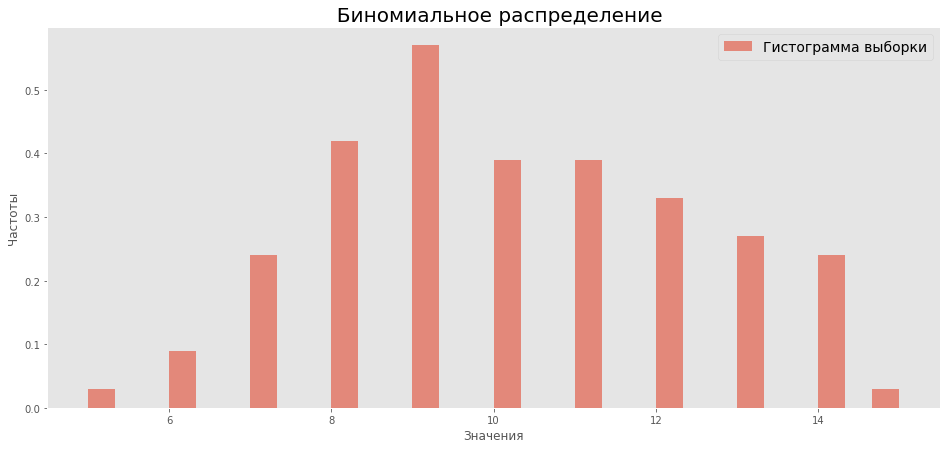

In [92]:
plot_graph("binom",p=0.5)

### Определение биномиального распределения
Дискретная случайная величина 𝜉 имеет биномиальный закон распределения с
параметрами 𝑛 и 𝑝, если она принимает значения 0,1, … , 𝑘, … 𝑛 с вероятностями:

Так как вероятность 𝑃(𝜉 = 𝑘) находится по формуле Бернулли, то биномиальный закон
распределения представляет собой закон распределения числа (𝜉 = 𝑘) наступлений
событий А в 𝑛 независимых испытаниях, в каждом из которых это событие появляется с
одной и той же вероятностью 𝑝.

**n - количество испытаний \
q - обратная вероятность к p, получается как (1-p) \
p - изначальная вероятность**

### Формула вероятности биномиального распределения
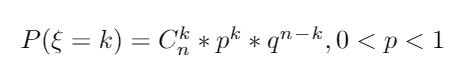

### Параметры биномиального распределения
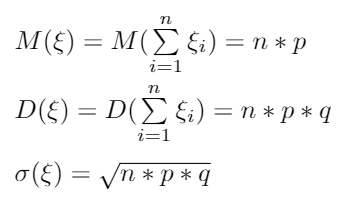

### Следующее распределение - Распределение Пуассона. 
P.S В жизни оно встречается чаще в случаях технических обращений в минуту, или сбоев / отказов на технической линии производства.

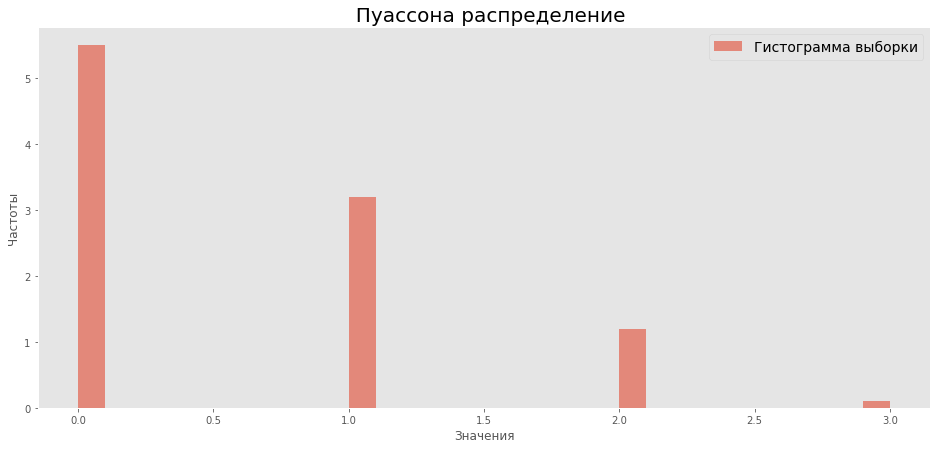

In [61]:
# Отобразим наше распределение и сгладим гистограмму
plot_graph("poisson",0.5)

У начинающих статистиков может возникнуть вопрос, как же так? Значение функции плотности и больше 1? Не может быть!

Но. Стоп. Не надо путать значение функции плотности и площадь под ней, я нашел очень крутую статью, которая поможет полностью закрыть этот вопрос и больше к нему не возвращаться [тык, который ведет на статью](https://medium.com/nuances-of-programming/%D0%BF%D0%BB%D0%BE%D1%82%D0%BD%D0%BE%D1%81%D1%82%D1%8C-%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8-%D0%BD%D0%B5-%D0%B5%D1%81%D1%82%D1%8C-%D1%81%D0%B0%D0%BC%D0%B0-%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D1%8C-98b1fc8e0ac5).

### Определение распределения Пуассона
Дискретная случайная величина 𝜉 имеет распределение Пуассона с параметром 𝜆 > 0,
если она принимает значения 0,1, … , 𝑘, … (бесконечное, но счетное множество значений)
с вероятностями:


**Важное свойство распределения Пуассона**:

Сумма двух независимых случайных величин, распределённых по закону Пуассона, с
параметрами 𝜆1, 𝜆2, также распределена по закону Пуассона с параметром 𝜆 = 𝜆1 + 𝜆2.
Это свойство устанавливается с использованием формулы свертки для дискретных
распределений.

### Формула вероятности распределения Пуассона
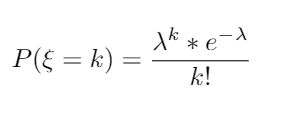

**k - количество событий \
𝜆 - математическое ожидание случайной величины (среднее количество событий за фиксированный промежуток времени)**

### Параметры распределения Пуассона
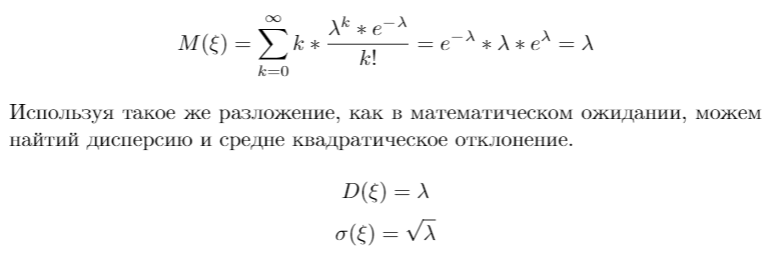

In [62]:
# Проверим теорию на практике
poisson_ = sts.poisson(0.5)
data_poisson_ = poisson_.rvs(size = 100)
print(poisson_.mean()) # средняя (мат.ожидание)
print(poisson_.var()) # дисперсия
print(data_poisson_.var()) # выборочная дисперсия
print(poisson_.mean() == poisson_.var())

0.5
0.5
0.40750000000000014
True


### Теперь рассмотрим геометрическое распределение. 
P.S Распределение любителей монеток и стрелков

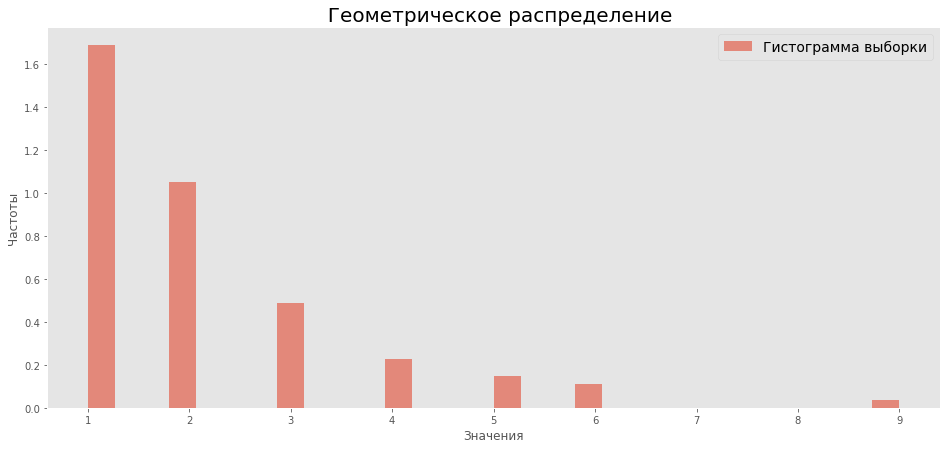

In [63]:
# Отобразим наше распределение и сгладим гистограмму
plot_graph("geom",0.5)

### Определение геометрического распределения
Дискретная случайная величина 𝜉 имеет геометрическое распределение с параметром 𝑝,
если она принимает значения 1, … , 𝑘, … (бесконечное, но счетное множество значений) с
вероятностями:

### Формула вероятности геометрического распределения
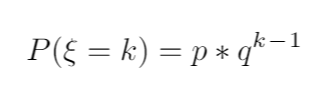

**k - количество событий \
 p  - вероятность \
 q - обратная вероятность (1-p)** 

### Параметры геометрического распределения 
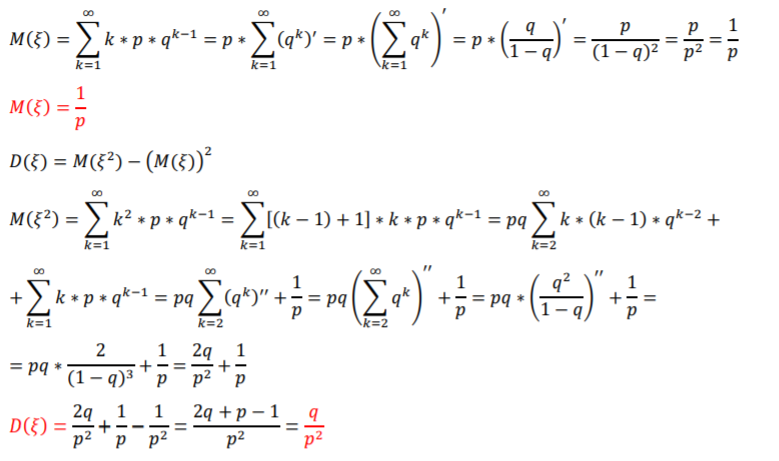

In [64]:
# Проверим теорию на практике
geom_ = sts.geom(0.4)
data_geom_ = geom_.rvs(size = 100)
print(geom_.mean()) # средняя (мат.ожидание)
print(geom_.var()) # дисперсия
print(data_geom_.var()) # выборочная дисперсия

2.5
3.749999999999999
2.8636


### Последнее на рассмотрение из дискретных распределений - Гипергеометрическое
P.S Для любителей повытаскивать детальки

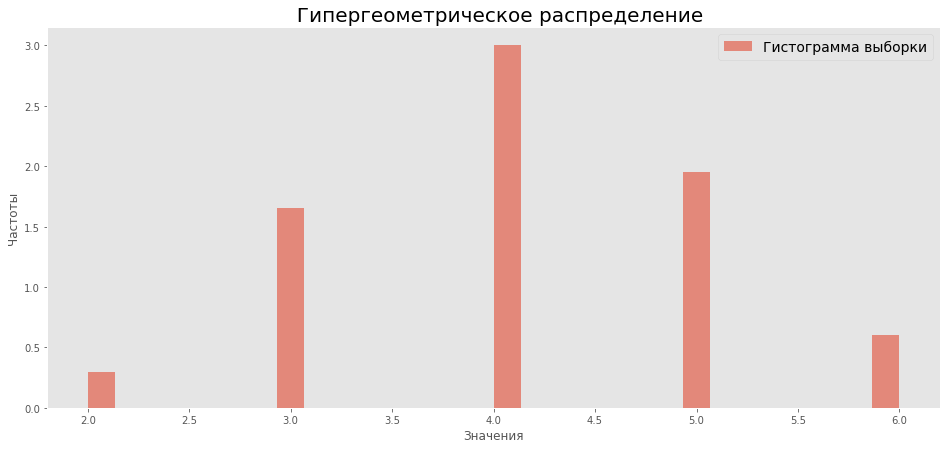

In [71]:
plot_graph('hyper',20,7,12)

### Определение гипергеометрического распределения 
**Пример для понимания из Википедии**: \
Осуществлена поставка из **N** объектов, из которых **D** имеют дефект. Гипергеометрическое распределение описывает вероятность того, что в выборке из n различных объектов, вытянутых из поставки, ровно **k** объектов являются бракованными.

В общем, если случайная величина **X** соответствует гипергеометрическому распределению с параметрами **N**, **D** и **n**, то вероятность получения ровно **k** успехов определяется формулой:

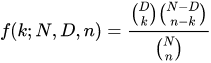

**Определение**: \
Пусть имеется конечная совокупность, состоящая из **N** элементов. 
Предположим, что **D** (Дефектные) из них обладают нужным нам свойством. Оставшиеся **N - D**  этим свойством не обладают. Случайным образом из общей совокупности выбирается группа из **n** элементов. Пусть **Y** - случайная величина, равная количеству выбранных элементов, обладающих нужным свойством. Тогда функция вероятности **Y** имеет вид:

### Формула вероятности гипергеометрического распределения 
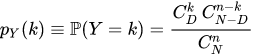

### Параметры гипергеометрического распределения 
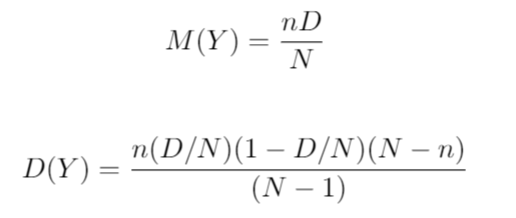

In [66]:
# Проверим теорию на практике
hypergeom_ = sts.hypergeom(20,7,15) # Пример: N - всего животных, D - сколько там, собак, или т.д, n - выборка из всех (n)
data_hypergeom_ = hypergeom_.rvs(size = 100)
print(hypergeom_.mean() == 7 * (15/20)) # средняя (мат.ожидание)
print(hypergeom_.var()) # дисперсия
print(data_hypergeom_.var()) # выборочная дисперсия

True
0.8980263157894737
0.8715999999999999


# Непрерывные распределения

### Первое на очереди распределение из непрерывных - Равномерное
P.S Если вас спросят, сколько примерно стоять на автобусной остановке - вы знаете ответ.

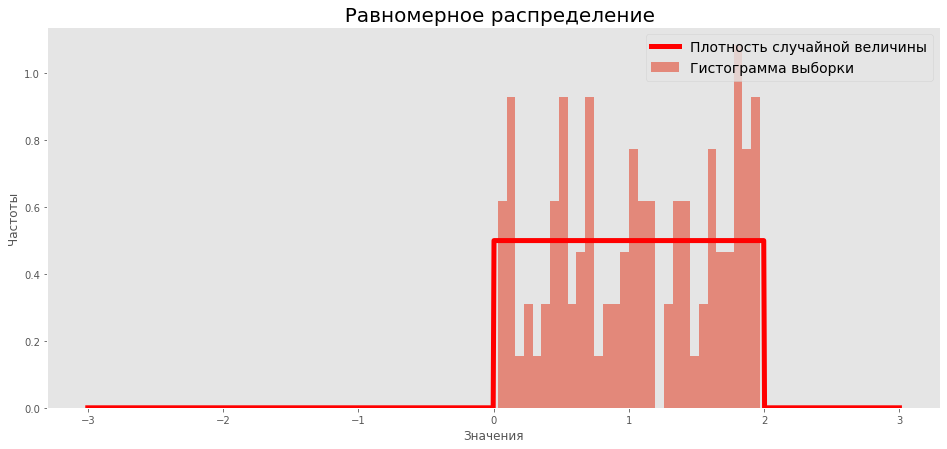

In [80]:
plot_graph('uniform',0,2)

### Определение равномерного распределения 
Непрерывная случайная величина 𝜉 имеет равномерное распределение на отрезке [𝑎; 𝑏],
если:

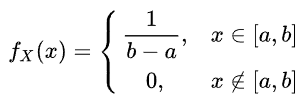

### Функция распределения выглядит так
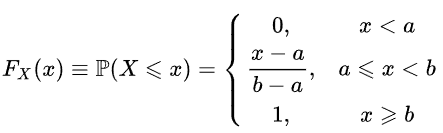

### Параметры равномерного распределения 
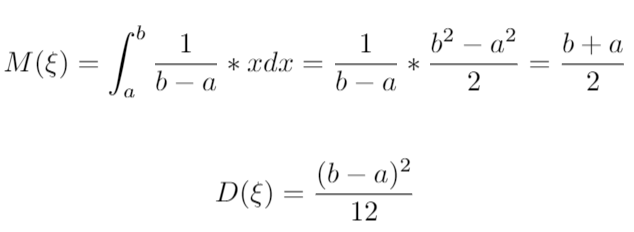

In [81]:
# Проверим теорию на практике
uniform = sts.uniform(0,2) # Пример: N - всего животных, D - сколько там, собак, или т.д, n - выборка из всех (n)
data_uniform = uniform.rvs(size = 20)
print(uniform.mean()) # средняя (мат.ожидание)
print(uniform.var()) # дисперсия
print(data_uniform.var()) # выборочная дисперсия

1.0
0.3333333333333333
0.3734695175870683


### Второе распределение - Показательное (Экспоненциальное)

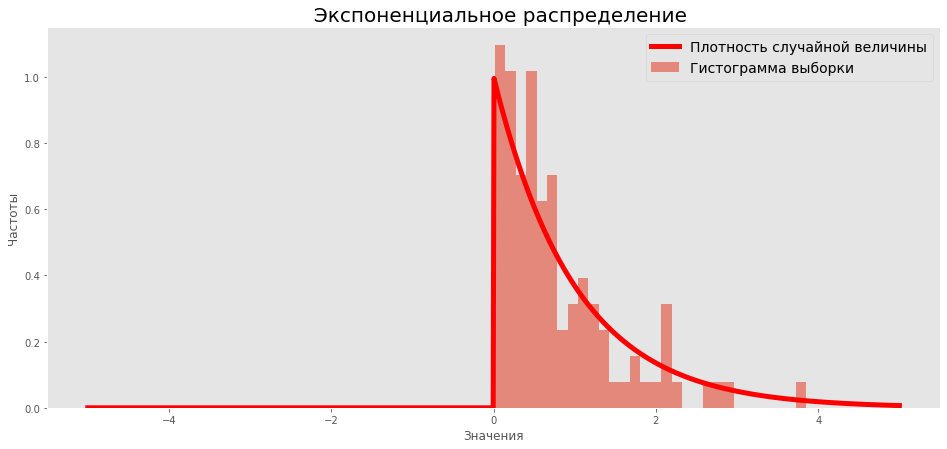

In [93]:
plot_graph('expon')

### Определение показательного распределения 
Непрерывная случайная величина 𝜉, принимающая неотрицательные значения,
называется распределённой по показательному закону с параметром 𝜆 > 0, если её
плотность распределения имеет вид:

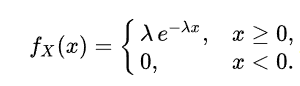

### Примеры встреч этого распределения в реальной жизни:

Типичные примеры, где реализуется экспоненциальное распределение – теория обслуживания, при этом X - например, время ожидания при техническом обслуживании, и теория надежности, здесь X - например, срок службы радиоэлектронной аппаратуры.

### Формула распределения вероятности показательного распределения 
Интегрируя плотность, получаем функцию экспоненциального распределения:
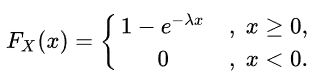

### Параметры гипергеометрического распределения 
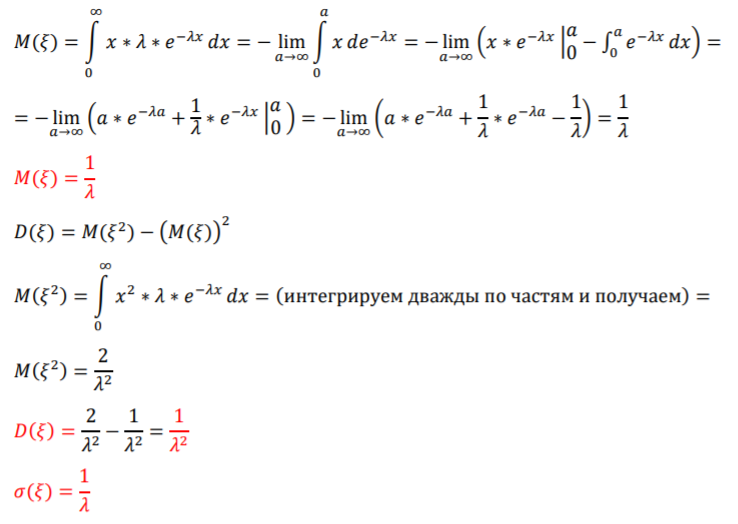

# Главное, и самое знаковое распределение - нормальное (Гауссово)

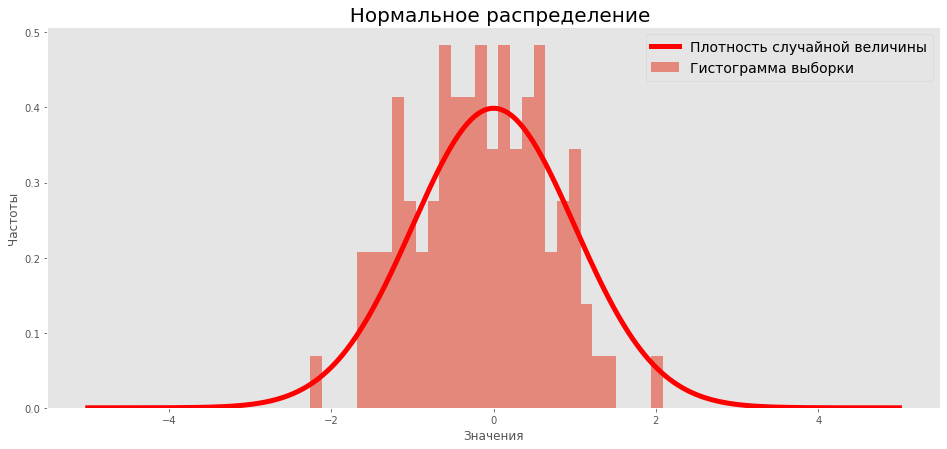

In [103]:
plot_graph('norm')

### Определение нормального распределения 
Нормальное распределение - это распределение вероятностей, которое в одномерном случае задаётся функцией плотности вероятности, совпадающей с функцией Гаусса:

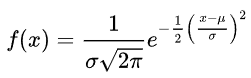

где параметр $\mu$  - мат.ожидание (среднее значение), медиана и мода распределения, а параметр $\sigma$ — среднеквадратическое отклонение, $\sigma ^{2}$ — дисперсия распределения.
Таким образом, одномерное нормальное распределение является двухпараметрическим семейством распределений, которое принадлежит экспоненциальному классу распределений.

**Стандартным нормальным распределением** называется нормальное распределение с математическим ожиданием $\mu = 0$ и стандартным отклонением $\sigma =1$

**Важный факт, про центральную предельную теорему** \
Если величина является суммой многих случайных слабо взаимозависимых величин, каждая из которых вносит малый вклад относительно общей суммы, то центрированное и нормированное распределение такой величины при достаточно большом числе слагаемых стремится к нормальному распределению.

Это следует из центральной предельной теоремы теории вероятностей. В окружающем нас мире часто встречаются величины, значение которых определяется совокупностью многих независимых факторов. Этот факт, а также то, что распределение считалось типичным, обычным, привели к тому, что в конце XIX века стал использоваться термин «нормальное распределение»

### Функция распределения вероятности нормального распределения
Функция распределения стандартного нормального распределения обычно обозначается заглавной греческой буквой $\Phi$(фи) и представляет собой интеграл:
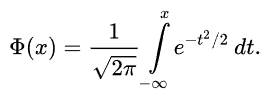

### Правило трех сигм
Около 68 % значений из нормального распределения находятся на расстоянии не более одного стандартного отклонения σ от среднего, около 95 % значений лежат расстоянии не более двух стандартных отклонений, и 99,7 % не более трёх. Этот факт является частным случаем правила 3 сигм для нормальной выборки.

Правило трёх сигм $3\sigma$ — практически все значения нормально распределённой случайной величины лежат в интервале:

$\left(\mu -3\sigma ;\mu +3\sigma \right)$,
где $\mu =\mathbb {M} \xi$ — математическое ожидание и параметр нормальной случайной величины.
Более точно — приблизительно с вероятностью 0,9973 значение нормально распределённой случайной величины лежит в указанном интервале.

### График плотности нормального распределения с процентами попадания в выбранные зоны 
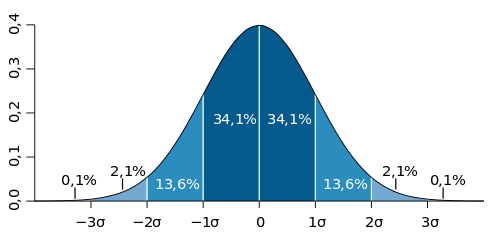

### Параметры (моменты) нормального распределения
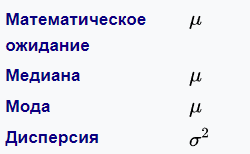

In [117]:
# Проверим теорию на практике
from statistics import mean, median, mode
norm_ = sts.norm(loc=1, scale=3) # loc - это математическое ожидание (коэф. сдвига), scale - средне квадратическое отклонение
data_uniform = norm_.rvs(size = 20)

In [134]:
print(norm_.mean()) # средняя (мат.ожидание)
print(norm_.median()) # средняя (мат.ожидание)
print(norm_.pdf(6)) # средняя (мат.ожидание)
print(norm_.var()) # дисперсия
print(data_uniform.var()) # выборочная дисперсия

1.0
1.0
0.03315904626424956
9.0
5.755454855645401


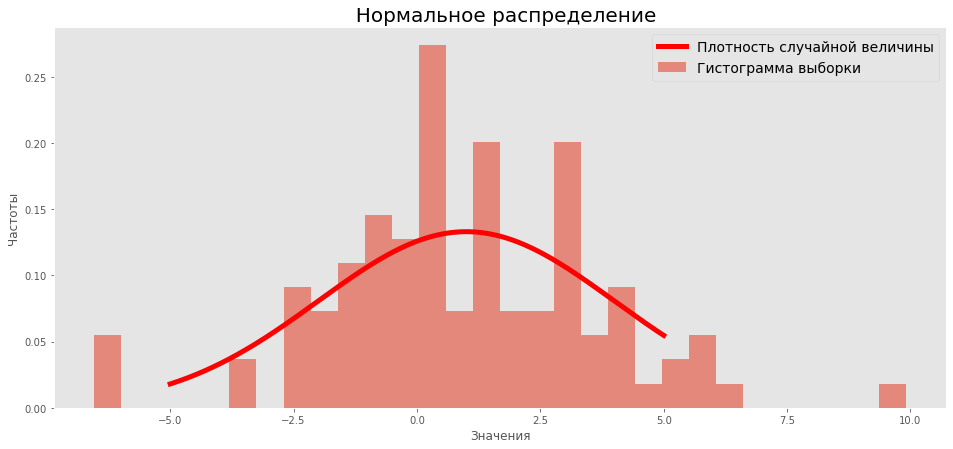

In [139]:
plot_graph('norm',1,3) # На графике можно заметить, что максимум у функции плотности как раз в точке 1 , следовательно
                       # все сходится, мода = медиане = мат.ожиданию

# Большинство основных распределений разобрано, остались только достаточно редкие, но не менее важные для математической статистики распределения, которые я рассмотрю уже в других тетрадках